In [1]:
import pandas as pd
# load data
saratoga = pd.read_csv('SaratogaHouses.csv')
saratoga.head()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


In [2]:
# code the dummy variables
saratoga=pd.get_dummies(saratoga,drop_first=True)
# create model matrix
X = saratoga.loc[:,saratoga.columns!="price"].values
y = saratoga['price'].values

Notice that, in general, you need to standardize your variables before running Ridge or Lasso. Sklearn does not do that for us automatically.

# Ridge

In [3]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standarized_x=scaler.fit(X).transform(X)

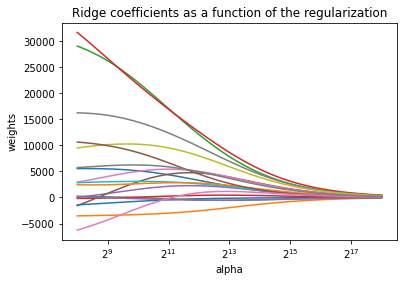

In [4]:
import numpy as np
from math import e
# #############################################################################
# Compute paths

n_alphas = 100
alphas = np.logspace(8, 18, n_alphas,base=2)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a,max_iter=10000)
    ridge.fit(standarized_x, y)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results
import matplotlib.pyplot as plt
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log", base=2)
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

In [5]:
def MSE(estimator,X_test,Y_test):
    return (-np.mean((Y_test - estimator.predict(X_test))**2))
from sklearn.linear_model import RidgeCV
reg = RidgeCV(cv=5,alphas=np.arange(0,100,1),scoring=MSE).fit(standarized_x, y)
reg.alpha_,-reg.best_score_

(58, 3858896302.76194)

In [6]:
reg.coef_

array([ 5392.50334242, -3701.54800096, 31560.53780856, 39435.12446292,
        -801.74812001, -4894.6440166 ,  1306.93766482, 15790.1807333 ,
        7968.14363068,  2046.35498248, -2248.92145737,  3109.91120777,
         772.94209909,   105.14523669,   722.33654657, 11074.09537674,
       -8641.23771412,  5085.36664018])

# Lasso

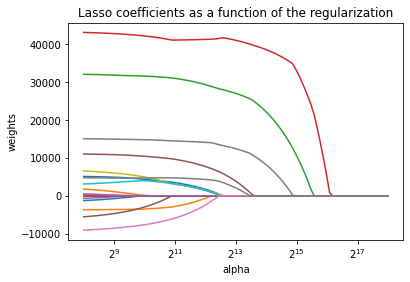

In [7]:
from sklearn.linear_model import Lasso
n_alphas = 100
alphas = np.logspace(8, 18, n_alphas,base=2)

coefs = []
for a in alphas:
    lasso = Lasso(alpha=a,max_iter=10000)
    lasso.fit(standarized_x, y)
    coefs.append(lasso.coef_)

# #############################################################################
# Display results
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log", base=2)
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Lasso coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

In [8]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=5, alphas=np.arange(1,5000,1),max_iter=100000).fit(standarized_x, y)
reg.alpha_

1307

In [9]:
reg.coef_

array([ 4077.6452497 , -3327.30838556, 31412.53756034, 41805.94848955,
          -0.        , -2007.35925862,     0.        , 14697.05048685,
        4358.3037996 ,  3756.42707885,    -0.        ,     0.        ,
          -0.        ,    -0.        ,     0.        , 10186.63251279,
       -7155.06727707,  4718.76568019])